In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modèle 'K Nearest Neighbors'

## 1. Classification des fleurs d'Iris

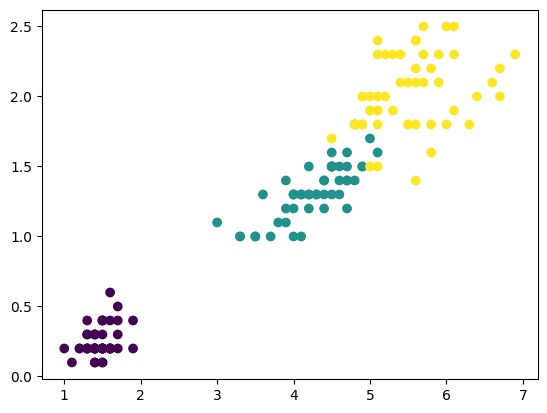

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

plt.scatter(X[:,2], X[:,3], c = y)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [4]:
model.score(X,y)

0.96

## 2. Reprise de l'exemple du Titanic

In [5]:
titanic = sns.load_dataset("titanic")
titanic = titanic.loc[:,['survived','pclass','sex','age']]
titanic.dropna(axis = 0, inplace = True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

<ipython-input-5-d2a5fbe7c37d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male','female'],[0,1],inplace=True)
<ipython-input-5-d2a5fbe7c37d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'].replace(['male','female'],[0,1],inplace=True)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [6]:
# target
y = titanic.survived

# Features
X = titanic.drop('survived', axis = 1).values

In [7]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

In [8]:
model.score(X,y)

0.8221288515406162

In [9]:
def survie(model, pclass, sex, age):
    X = np.array([pclass, sex, age]).reshape(1,3)
    print(model.predict(X))
    print(model.predict_proba(X))

In [10]:
survie(model, pclass=2, sex=0, age=20)

[0]
[[0.5 0.5]]


le meilleur score est atteint pour n = 4, il est de 0.834733893557423


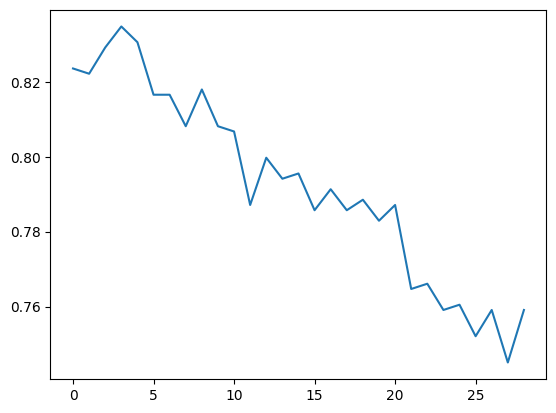

In [11]:
scores = []
score_max = 0
for n in range(1,30,1):
    model = KNeighborsClassifier(n_neighbors = n)
    model.fit(X, y)
    score = model.score(X,y)
    scores.append(score)
    # print(f"n = {n} - score = {score}")
    if score > score_max:
        score_max = score
        n_scoremax = n
plt.plot(scores)
print(f"le meilleur score est atteint pour n = {n_scoremax}, il est de {score_max}")

In [12]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X,y)
model.score(X,y)

0.834733893557423

In [13]:
survie(model, pclass=1, sex=0, age=20)

[0]
[[0.75 0.25]]


## 3. Vision par ordinateur avec K-NN

In [14]:
from sklearn.datasets import load_digits

In [15]:
digits = load_digits()

X = digits.data
y = digits.target

print("Dimension de X :", X.shape)

Dimension de X : (1797, 64)


In [16]:
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


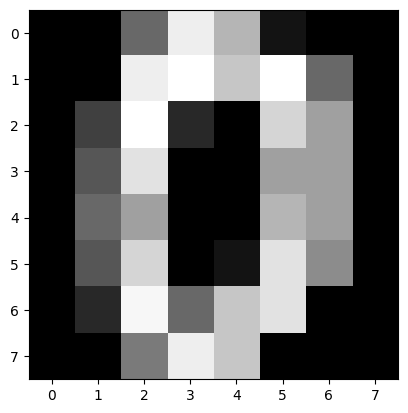

In [17]:
# visualisation d'un de ces chiffres

plt.imshow(digits['images'][0], cmap = 'Greys_r')

In [18]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)
model.score(X,y)

0.993322203672788

array([9])

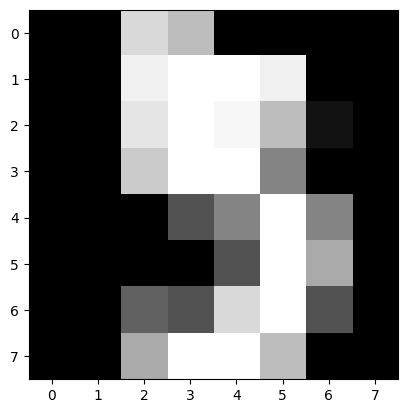

In [19]:
# Test du modèle

num = 5

test = X[num].reshape(1,-1)
plt.imshow(digits['images'][num], cmap = 'Greys_r')
model.predict(test)

# 2. Modèle d'arbre de décision (Random tree)

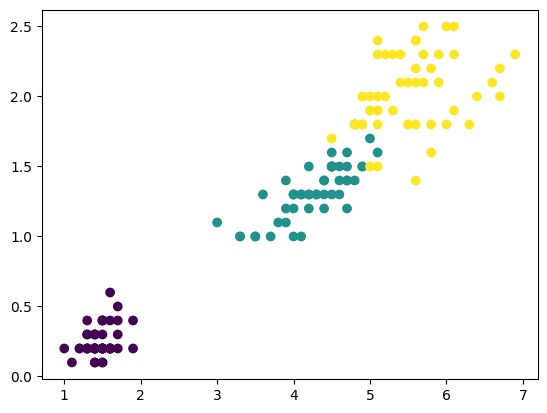

In [20]:
iris = load_iris()

X = iris.data
y = iris.target

plt.scatter(X[:,2], X[:,3], c = y)

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

1.0

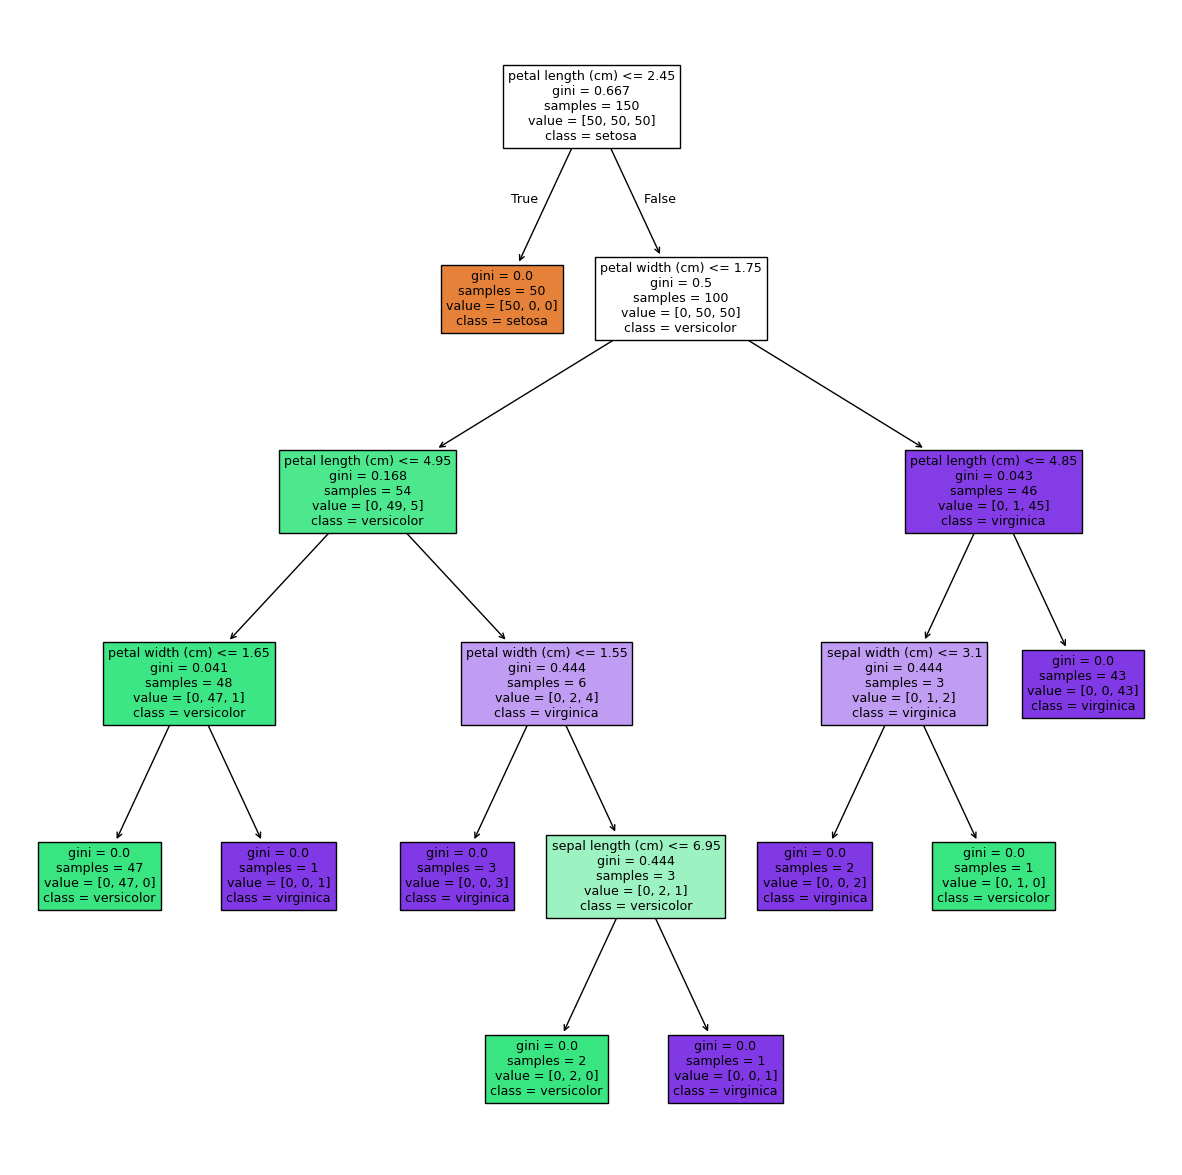

In [22]:
plt.figure(figsize=(15,15))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [23]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)
model.score(X, y)

0.96

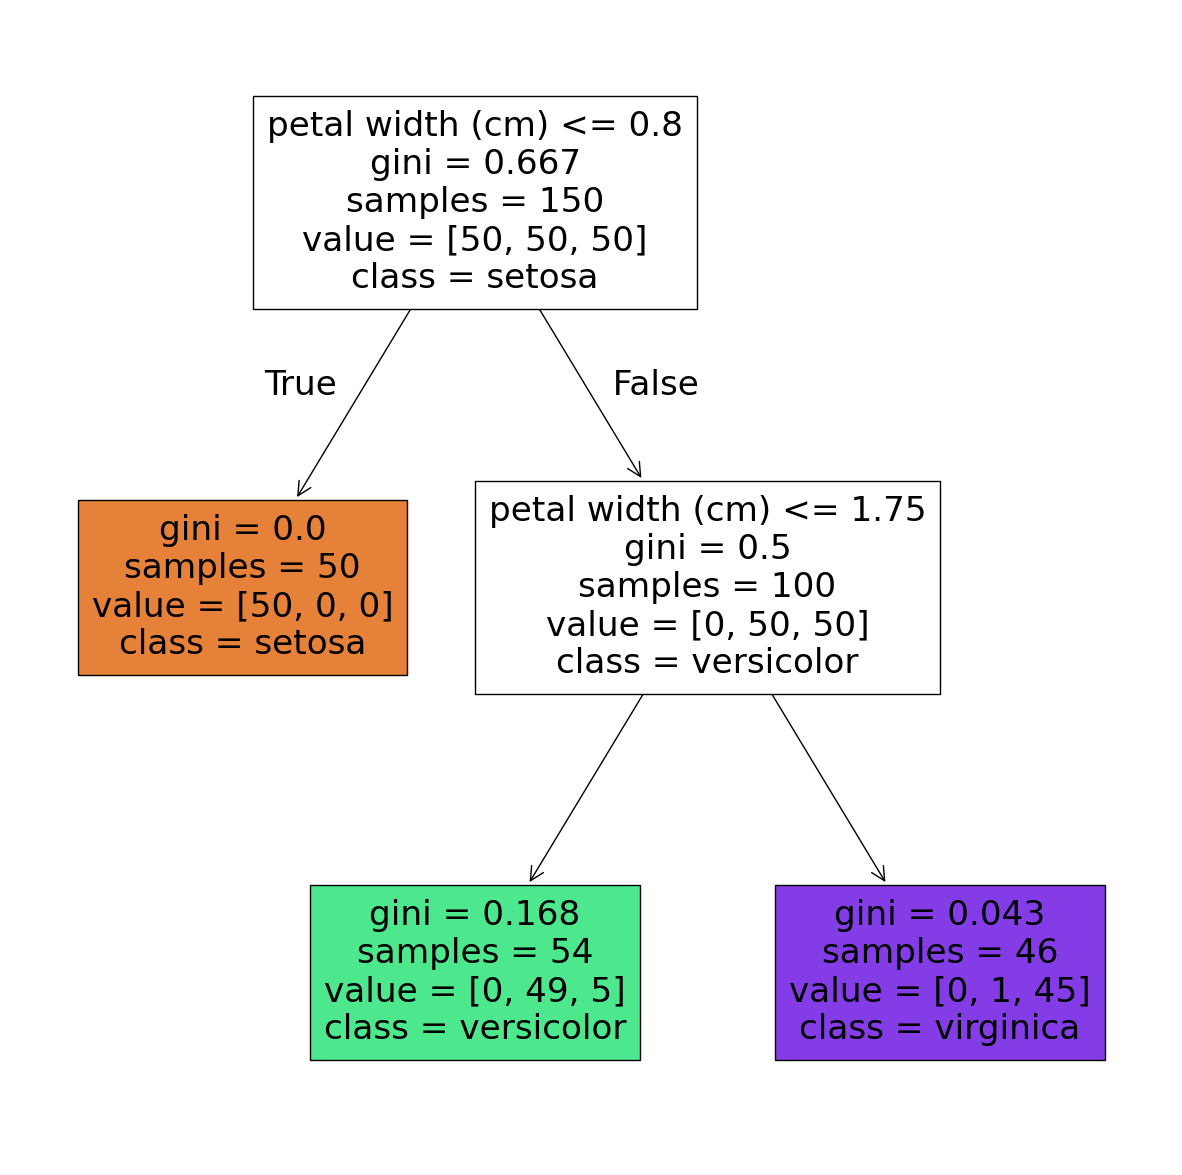

In [24]:
plt.figure(figsize=(15,15))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [25]:
titanic = sns.load_dataset("titanic")
titanic = titanic.loc[:,['survived','pclass','sex','age']]
titanic.dropna(axis = 0, inplace = True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

<ipython-input-25-d2a5fbe7c37d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['sex'].replace(['male','female'],[0,1],inplace=True)
<ipython-input-25-d2a5fbe7c37d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic['sex'].replace(['male','female'],[0,1],inplace=True)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [26]:
# target
y = titanic.survived

# Features
X = titanic.drop('survived', axis = 1)

In [27]:
model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)

0.896358543417367

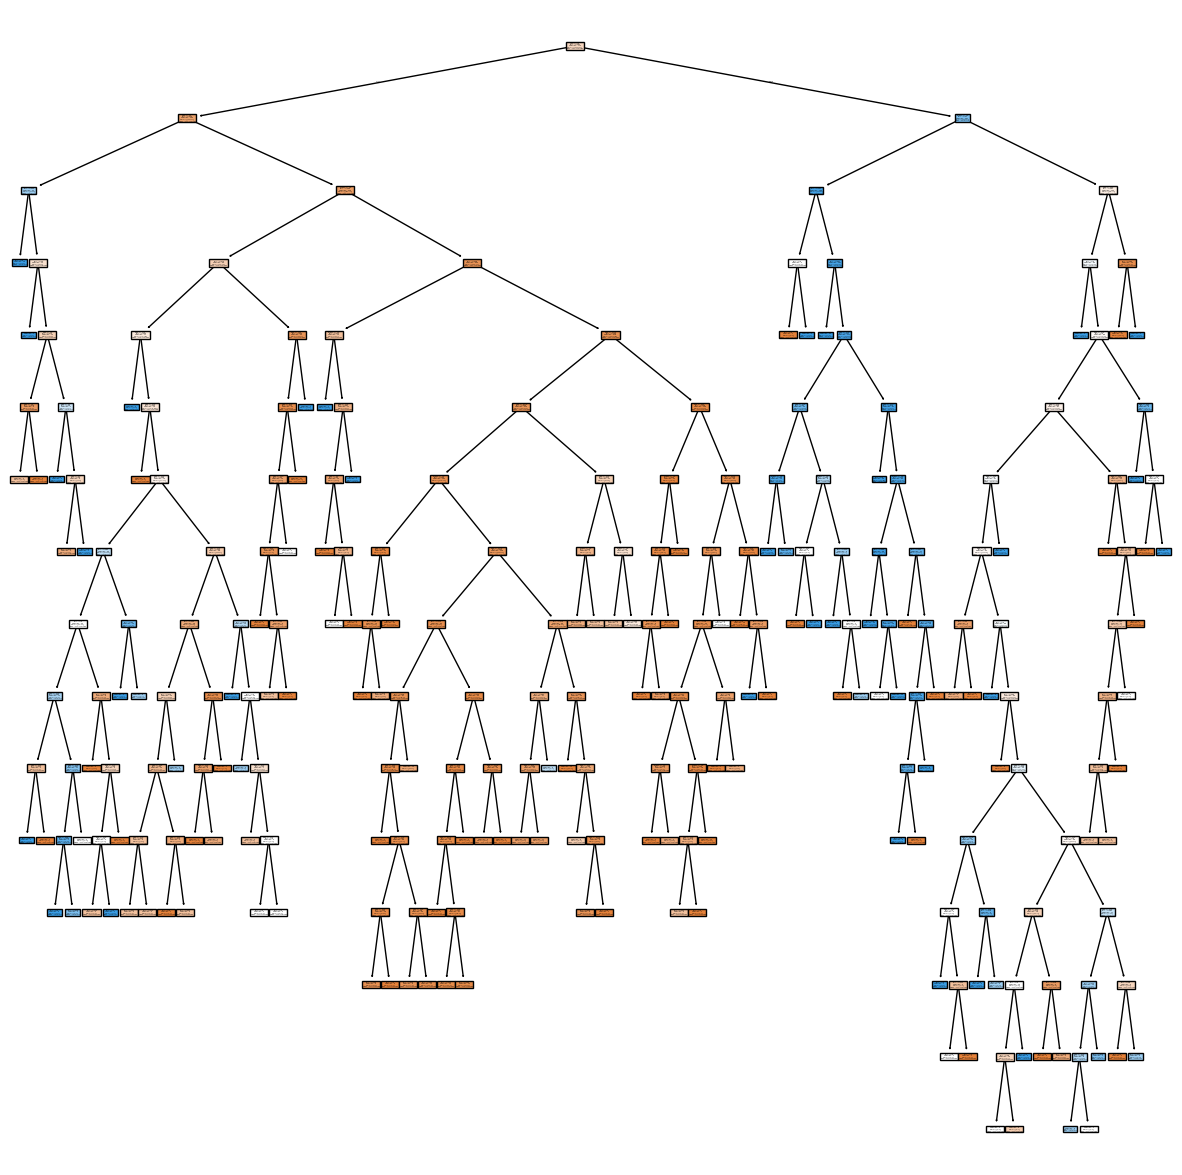

In [28]:
plt.figure(figsize=(15,15))
plot_tree(model, feature_names=X.columns.values, class_names=['Not Survived','Survived'], filled=True)
plt.show()